In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/data/train'
validation_path = '/content/drive/MyDrive/data/validation'

In [ ]:
import os

train_folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
print("Folders in the training dataset path:", train_folders)

validation_folders = [f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))]
print("Folders in the validation dataset path:", validation_folders)

Folders in the training dataset path: ['blue_finger', 'pitting', 'clubbing', 'Acral_Lentiginous_Melanoma', 'Onychogryphosis', 'Healthy_Nail']
Folders in the validation dataset path: ['clubbing', 'blue_finger', 'Onychogryphosis', 'pitting', 'Acral_Lentiginous_Melanoma', 'Healthy_Nail']


In [ ]:
folders = ['blue_finger', 'Acral_Lentiginous_Melanoma', 'pitting', 'Onychogryphosis', 'clubbing', 'Healthy_Nail']

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

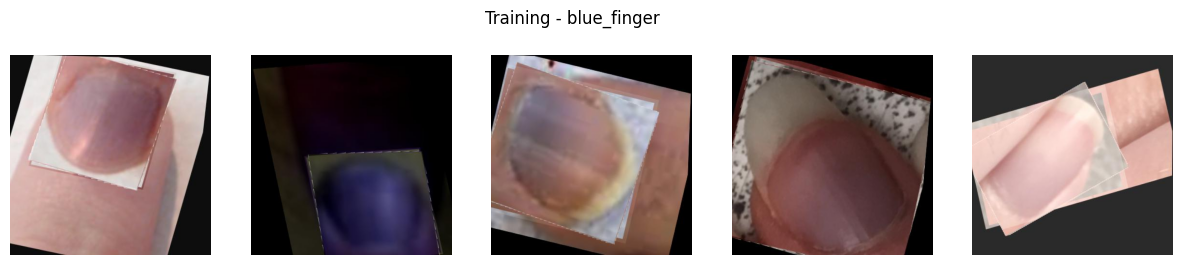

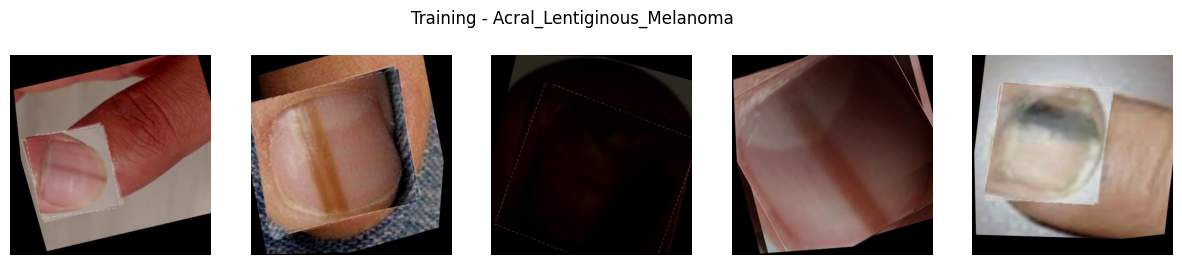

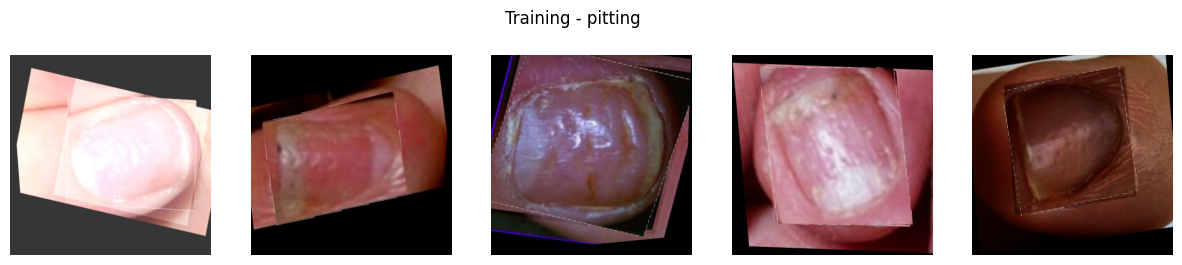

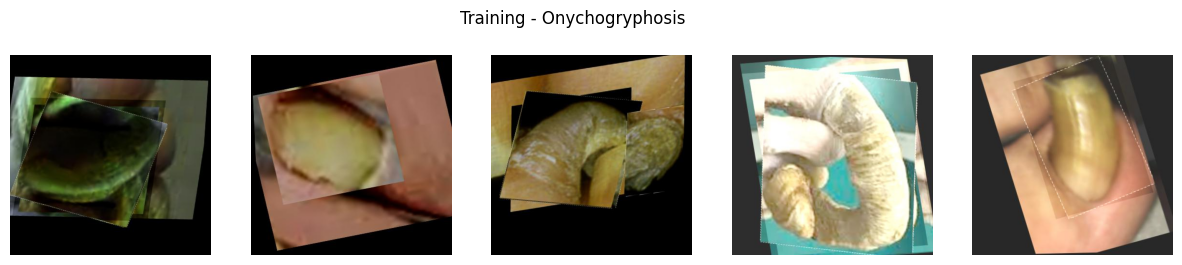

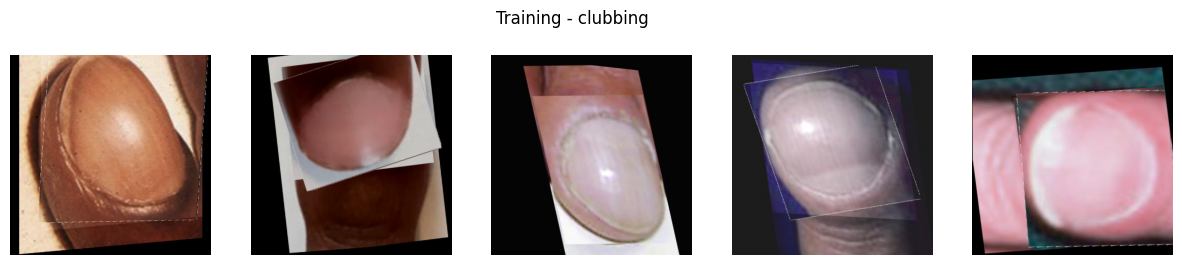

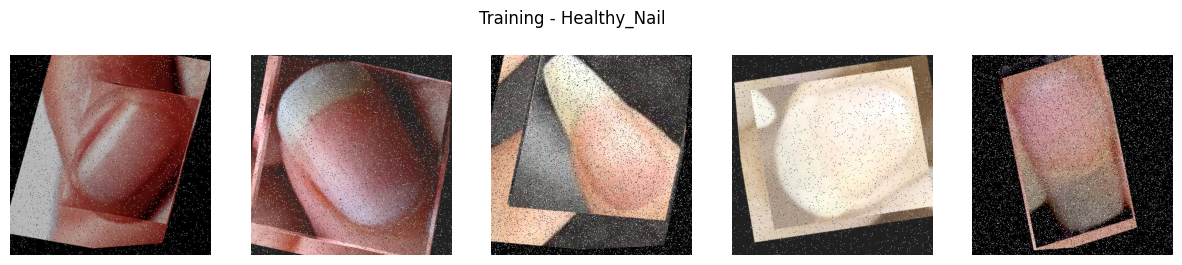

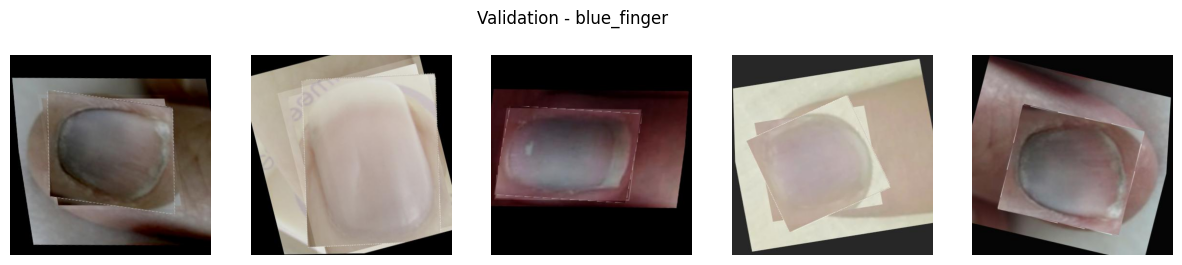

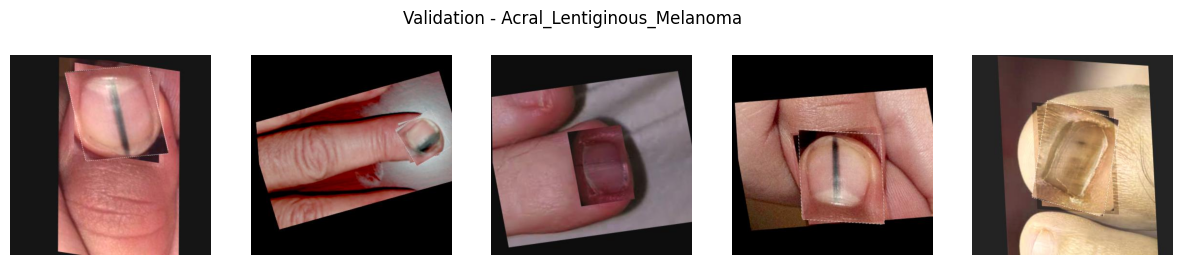

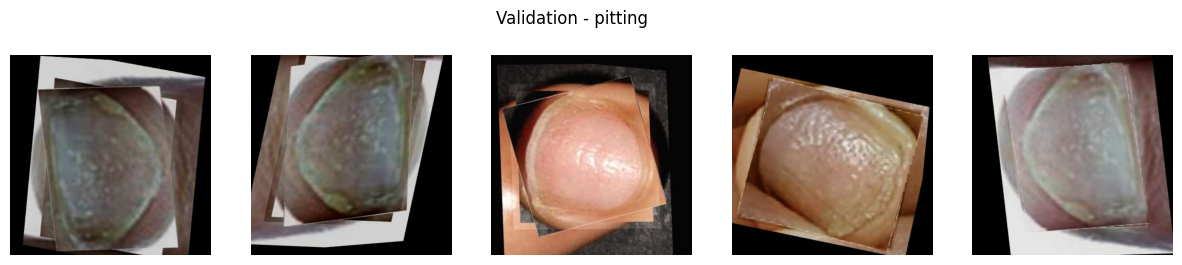

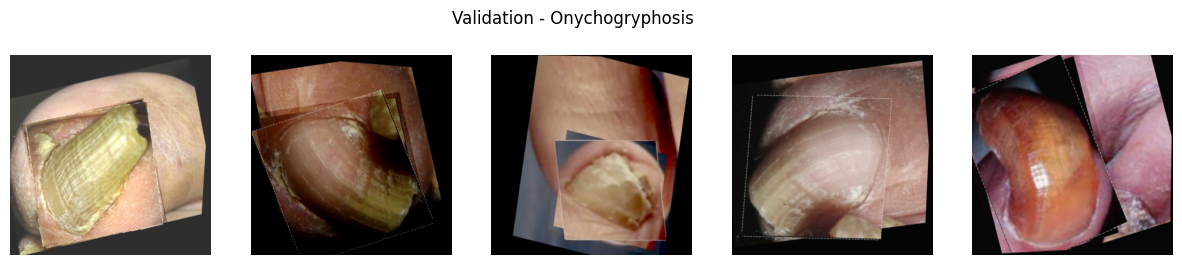

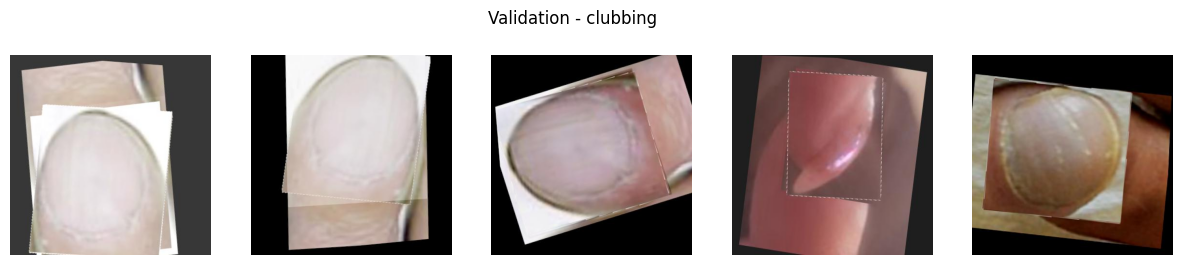

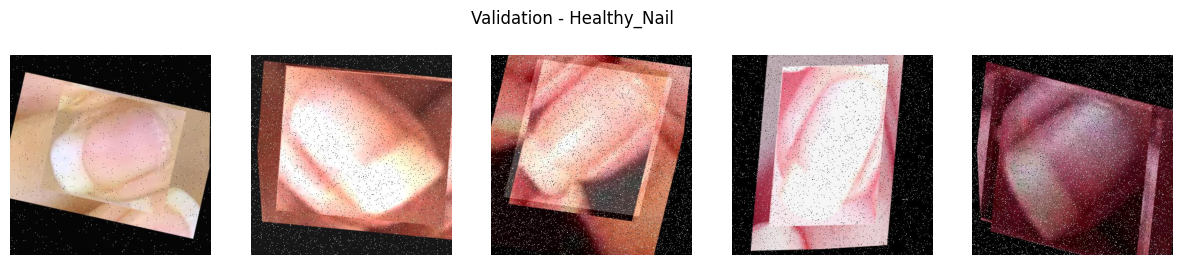

In [ ]:
def display_images_from_folder(folder_path, title):
    """Display up to 5 images from a specified folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = image_files[:5]

    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    display_images_from_folder(folder_path, f'Training - {folder}')

for folder in folders:
    folder_path = os.path.join(validation_path, folder)
    display_images_from_folder(folder_path, f'Validation - {folder}')

In [ ]:
def preprocess_image(image_path, size=(128, 128)):
    """Load, resize, and normalize an image."""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size)
    img = img / 255.0
    return img

def save_image(image, save_path):
    """Save a preprocessed image."""
    image = (image * 255).astype(np.uint8)
    img_pil = Image.fromarray(image)
    img_pil.save(save_path)

def preprocess_and_save_images(folder_path, save_dir, size=(128, 128)):
    """Preprocess and save images from a folder."""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path, size)
            save_path = os.path.join(save_dir, filename)
            save_image(preprocessed_img.numpy(), save_path)

In [ ]:
preprocess_and_save_images(train_path, train_path)
preprocess_and_save_images(validation_path, validation_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
def create_image_dataset(directory, img_size=(128, 128), batch_size=32):
    """Create a TensorFlow dataset from a directory of images."""
    datagen = ImageDataGenerator(rescale=1.0/255)

    dataset = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    return dataset

train_dataset = create_image_dataset(train_path)
val_dataset = create_image_dataset(validation_path)


Found 3744 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


In [ ]:
def create_model(input_shape, num_classes):
    """Create a CNN model for image classification."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
input_shape = (128, 128, 3)
num_classes = len(train_dataset.class_indices)

In [ ]:
model = create_model(input_shape, num_classes)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and will be used.")
else:
    print("No GPU found, using CPU.")

No GPU found, using CPU.


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 985s 8s/step - accuracy: 0.2545 - loss: 1.7171 - val_accuracy: 0.5495 - val_loss: 1.1946
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4264 - loss: 1.3345 - val_accuracy: 0.6044 - val_loss: 1.1118
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4944 - loss: 1.2218 - val_accuracy: 0.5824 - val_loss: 1.0504
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5405 - loss: 1.1345 - val_accuracy: 0.5714 - val_loss: 1.0495
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.5482 - loss: 1.1033 - val_accuracy: 0.5495 - val_loss: 1.0752
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.5629 - loss: 1.0695 - val_accuracy: 0.5824 - val_loss: 1.0430
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.5940 - loss: 1.0109 - val_accuracy: 0.6593 - val_loss: 0.9669
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6277 - loss: 0.9286 - val_accu

In [ ]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.6021 - loss: 1.1976
Validation Loss: 1.1943904161453247
Validation Accuracy: 0.5714285969734192


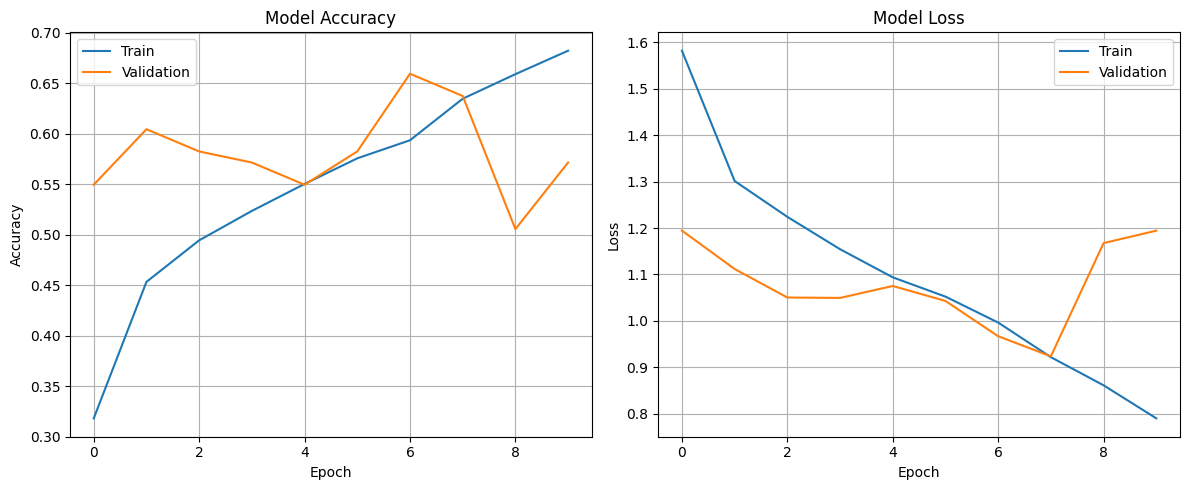

In [ ]:
def plot_history(history):
    """Plot the training history."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_history(history)